# Sync repo

In [0]:
%%shell
git clone --recursive https://github.com/AntiAegis/Human-Segmentation-PyTorch.git
cd Human-Segmentation-PyTorch
git submodule sync
git submodule update --init --recursive

#setup env

In [0]:
%%shell
cd Human-Segmentation-PyTorch
pip install virtualenvwrapper
export WORKON_HOME=$HOME/.virtualenvs
export PROJECT_HOME=$HOME/Devel
source /usr/local/bin/virtualenvwrapper.sh
workon humanseg
pip install -r requirements.txt
pip install -e models/pytorch-image-models

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Please download pre-trined model

In [0]:
%%shell
cd "/content/drive/My Drive/"
# download pre-trained model from repo https://github.com/AntiAegis/Human-Segmentation-PyTorch.git Download UNet_MobileNetV2
# unzip the file it will be used in the checkpint
tar xf UNet_MobileNetV2.tar.xz

# Please download inference_image.py from github repo and put it under cloned repo

In [0]:
%%shell
cd "/content/Human-Segmentation-PyTorch"
# python inference_webcam.py --use_cuda --checkpoint "/content/drive/My Drive/UNet_ResNet18.pth"
## inference_image.py can be found in the github repo
python inference_image.py --use_cuda --checkpoint "/content/drive/My Drive/UNet_MobileNetV2.pth" --image "/content/drive/My Drive/lisa.png" --output "/content/drive/My Drive/lisamask.jpg"
# python measure_model.py

# read the mask back

(912, 1642, 3)


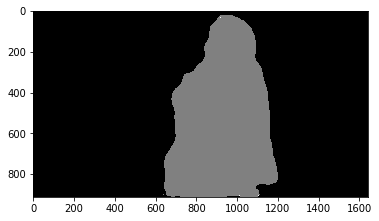

In [0]:
img = cv2.imread("/content/drive/My Drive/lisamask.jpg")
print(img.shape)
plt.imshow(img[:,:,2], cmap='gray')

/content/drive/My Drive/Colab Notebooks


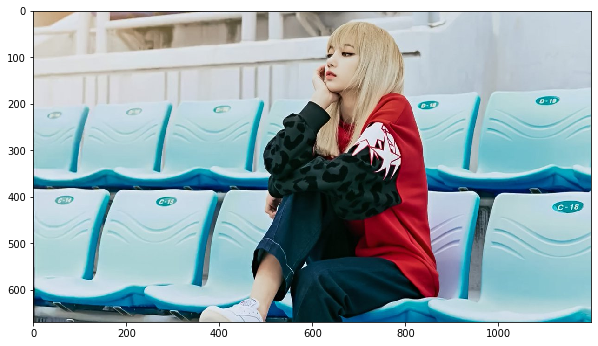

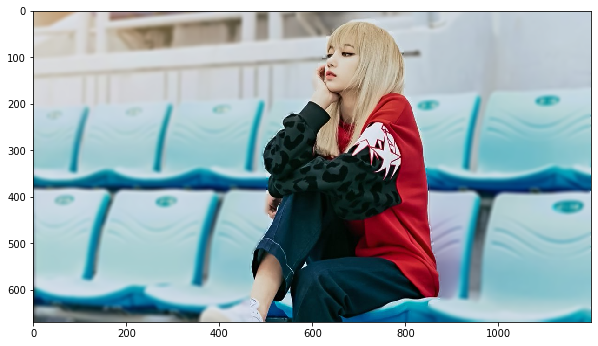

In [8]:
%cd "/content/drive/My Drive/Colab Notebooks"
import cv2
import matplotlib.pyplot as plt
import torch
import numpy as np
org = cv2.imread("123.jpg")
org = cv2.cvtColor(org, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(org)
plt.show()

blur = cv2.GaussianBlur(org,(13,13),cv2.BORDER_DEFAULT)

img = cv2.resize(img,(1200,669))


a = np.array([0,0,0])
for row in range(len(img)):
  for col in range(len(img[row])):
    if not np.array_equal(img[row][col],a):
      blur[row][col] = org[row][col]

plt.figure(figsize=(10,10))
plt.imshow(blur)
plt.show()